In [28]:
import os

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display, display_html , HTML
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

In [73]:
train = pd.read_csv('train.csv')
train.name = 'train'
verify = pd.read_csv('val.csv')
verify.name = 'verify'
test = pd.read_csv('test.csv')
test.name = 'test'

datasets = [train,verify,test]
pd.set_option('display.max_row',max(train.shape[0],verify.shape[0],test.shape[0]))
pd.set_option('display.max_column',max(train.shape[1],verify.shape[1],test.shape[1]))
for df in datasets:
    print ("The dataset",df.name,"has",df.shape[0],"rows and",df.shape[1],"columns")

The dataset train has 79786 rows and 54 columns
The dataset verify has 2836 rows and 55 columns
The dataset test has 2836 rows and 54 columns


<font size=5>按照事件、车辆、司机信息和发生地点分割数据集，便于数据的观察和处理</font>

In [74]:
characteristics=train.loc[:,['Num_Acc','jour','mois','an','hrmn','lum','dep','com','agg','int','atm','col','adr','lat','long']]
#characteristics.to_csv('characteristics.csv')
vehicles=train.loc[:,['id_vehicule','Num_Acc','num_veh','senc','catv','obs','obsm','choc','manv','motor','occutc']]
#vehicles.to_csv('vehicles.csv')
drivers=train.loc[:,['id_vehicule','Num_Acc','num_veh','place','catu','grav','sexe','an_nais','trajet','secu1','secu2','secu3','locp','actp','etatp']]
#drivers.to_csv('drivers.csv')
places=train.loc[:,['Num_Acc','catr','voie','v1','v2','circ','nbv','vosp','prof','pr','pr1','plan','lartpc','larrout','surf','infra','situ','vma']]
#places.to_csv('places.csv')

In [75]:
#pd.read_csv('characteristics.csv')
display(HTML('<h1>characteristics</h1>'))
display(characteristics.head())
#pd.read_csv('vehicles.csv')
display(HTML('<h1>vehicles</h1>'))
display(vehicles.head())
#pd.read_csv('drivers.csv')
display(HTML('<h1>drivers</h1>'))
display(drivers.head())
#pd.read_csv('places.csv')
display(HTML('<h1>places</h1>'))
display(places.head())

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,201900000001,30.0,11.0,2019.0,0.062500,4.0,93,93053,1.0,1.0,1.0,2.0,AUTOROUTE A3,488962100.0,24701200.0
1,201900000001,30.0,11.0,2019.0,0.062500,4.0,93,93053,1.0,1.0,1.0,2.0,AUTOROUTE A3,488962100.0,24701200.0
2,201900000003,28.0,11.0,2019.0,0.635417,1.0,92,92036,1.0,1.0,1.0,4.0,AUTOROUTE A86,489358718.0,23191744.0
3,201900000003,28.0,11.0,2019.0,0.635417,1.0,92,92036,1.0,1.0,1.0,4.0,AUTOROUTE A86,489358718.0,23191744.0
4,201900000003,28.0,11.0,2019.0,0.635417,1.0,92,92036,1.0,1.0,1.0,4.0,AUTOROUTE A86,489358718.0,23191744.0


,id_vehicule,Num_Acc,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,138 306 524,201900000001,B01,2,7,0,2,5,23,1,NaN
1,138 306 525,201900000001,A01,2,17,1,0,3,11,1,NaN
2,138 306 522,201900000003,C01,1,7,0,2,4,23,6,NaN
3,138 306 520,201900000003,A01,1,7,0,2,1,2,1,NaN
4,138 306 521,201900000003,B01,1,7,1,0,4,2,1,NaN


,id_vehicule,Num_Acc,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,138 306 524,201900000001,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1
1,138 306 525,201900000001,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,-1
2,138 306 522,201900000003,C01,1,1,1,1,1966,1,1,0,-1,-1,0,-1
3,138 306 520,201900000003,A01,2,2,4,2,1930,9,1,0,-1,-1,0,-1
4,138 306 521,201900000003,B01,1,1,4,1,1995,9,1,0,-1,-1,0,-1


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,201900000001,1.0,3,0.0,NaN,3.0,10.0,0.0,1.0,6.0,900.0,2.0,NaN,NaN,1.0,2.0,1.0,70.0
1,201900000001,1.0,3,0.0,NaN,3.0,10.0,0.0,1.0,6.0,900.0,2.0,NaN,NaN,1.0,2.0,1.0,70.0
2,201900000003,1.0,86,0.0,NaN,3.0,8.0,0.0,1.0,10.0,500.0,3.0,NaN,NaN,1.0,0.0,1.0,90.0
3,201900000003,1.0,86,0.0,NaN,3.0,8.0,0.0,1.0,10.0,500.0,3.0,NaN,NaN,1.0,0.0,1.0,90.0
4,201900000003,1.0,86,0.0,NaN,3.0,8.0,0.0,1.0,10.0,500.0,3.0,NaN,NaN,1.0,0.0,1.0,90.0


*观察特征的数据类型*

In [76]:
characteristics_dtypes = pd.DataFrame(np.transpose(np.array((characteristics.columns,characteristics.dtypes),dtype=object,)),columns=['features','dtype'])
vehicles_dtypes = pd.DataFrame(np.transpose(np.array((vehicles.columns,vehicles.dtypes),dtype=object,)),columns=['features','dtype'])
places_dtypes = pd.DataFrame(np.transpose(np.array((places.columns,places.dtypes),dtype=object,)),columns=['features','dtype'])
drivers_dtypes = pd.DataFrame(np.transpose(np.array((drivers.columns,drivers.dtypes),dtype=object,)),columns=['features','dtype'])


characteristics_dtypes = characteristics_dtypes.style.set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
vehicles_dtypes = vehicles_dtypes.style.set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
places_dtypes = places_dtypes.style.set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
drivers_dtypes = drivers_dtypes.style.set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])


characteristics_dtypes_styler = characteristics_dtypes.set_table_attributes("style='display:inline'").set_caption('characteristics')
vehicles_dtypes_styler = vehicles_dtypes.set_table_attributes("style='display:inline'").set_caption('vehicles')
places_dtypes_styler = places_dtypes.set_table_attributes("style='display:inline'").set_caption('places')
drivers_dtypes_styler = drivers_dtypes.set_table_attributes("style='display:inline'").set_caption('drivers')
space = "\xa0" * 50
display_html(characteristics_dtypes_styler._repr_html_() + vehicles_dtypes_styler._repr_html_() +  places_dtypes_styler._repr_html_()+ drivers_dtypes_styler._repr_html_(), raw=True)

,features,dtype
0,Num_Acc,int64
1,jour,float64
2,mois,float64
3,an,float64
4,hrmn,float64
5,lum,float64
6,dep,object
7,com,object
8,agg,float64
9,int,float64


In [77]:
display(HTML('<h1><center>数据的异常概率(%)</center></h1>'))
a = pd.DataFrame(np.transpose(np.array((characteristics.columns,round(characteristics.isna().sum()/characteristics.shape[0]*100,2)),dtype=object,)),columns=['features','missing_rate'])
b = pd.DataFrame(np.transpose(np.array((vehicles.columns,round(vehicles.isna().sum()/vehicles.shape[0]*100,2)),dtype=object,)),columns=['features','missing_rate'])
c = pd.DataFrame(np.transpose(np.array((places.columns,round(places.isna().sum()/places.shape[0]*100,2)),dtype=object,)),columns=['features','missing_rate'])
d = pd.DataFrame(np.transpose(np.array((drivers.columns,round(drivers.isna().sum()/drivers.shape[0]*100,2)),dtype=object,)),columns=['features','missing_rate'])

def highlight_greaterthan(x):
    if x.missing_rate > 90:
        return ['background-color: #FFCECE']*2
    if x.missing_rate > 50:
        return ['background-color: #FFE9CE']*2
    if x.missing_rate > 5:
        return ['background-color: #FFFECE']*2
    else:
        return ['background-color: #CEFFFC']*2
    
a = a.style.apply(highlight_greaterthan, axis=1).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
b = b.style.apply(highlight_greaterthan, axis=1).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
c = c.style.apply(highlight_greaterthan, axis=1).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])
d = d.style.apply(highlight_greaterthan, axis=1).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', '#585858'),
        ('font-size', '30px')
    ]
}])

a_styler = a.set_table_attributes("style='display:inline'").set_caption('characteristics')
b_styler = b.set_table_attributes("style='display:inline'").set_caption('vehicles')
c_styler = c.set_table_attributes("style='display:inline'").set_caption('places')
d_styler = d.set_table_attributes("style='display:inline'").set_caption('drivers')

space = "\xa0" * 50
display_html(a_styler._repr_html_()+ b_styler._repr_html_()+ c_styler._repr_html_() + d_styler._repr_html_(), raw=True)


,features,missing_rate
0,Num_Acc,0.000000
1,jour,0.200000
2,mois,0.200000
3,an,0.200000
4,hrmn,0.200000
5,lum,0.200000
6,dep,0.200000
7,com,0.200000
8,agg,0.200000
9,int,0.200000


*可以注意到一些数据中的异常缺失占比过大，需要进行处理*

In [9]:
display(HTML('<h3><i>characteristics</i></h3>'))
for col in characteristics.select_dtypes("object"):
    print('\n')
    print('Number of values in "',col,'"', {characteristics[col].nunique()})
    print(characteristics[col].unique())
    print('\n')
    print('------------------------------------------------')



Number of values in " dep " {107}
['93' '92' '94' '87' '69' '38' '34' '13' '988' '976' '972' '2B' '91' '86'
 '83' '78' '77' '76' '72' '71' '67' '66' '60' '51' '50' '45' '37' '35'
 '33' '31' '29' '22' '19' '18' '17' '74' '2' '80' '59' '95' '63' '62'
 '974' '973' '2A' '84' '64' '9' '73' '43' '10' '36' '16' '7' '21' '40'
 '24' '4' '85' '27' '28' '52' '68' '42' '82' '49' '11' '30' '44' '61' '14'
 '56' '58' '54' '47' '41' nan '3' '75' '1' '57' '39' '23' '6' '5' '26'
 '48' '986' '971' '89' '25' '12' '88' '987' '65' '53' '46' '81' '8' '79'
 '32' '70' '90' '55' '978' '15' '977' '975']


------------------------------------------------


Number of values in " com " {10018}
['93053' '92036' '94069' ... '31228' '33022' '85099']


------------------------------------------------


Number of values in " adr " {27247}
['AUTOROUTE A3' 'AUTOROUTE A86' 'A4' ... '1 Rue des Bouvreuils'
 'Route de Castelnau' 'Route de Nieul-le-Dolent']


------------------------------------------------


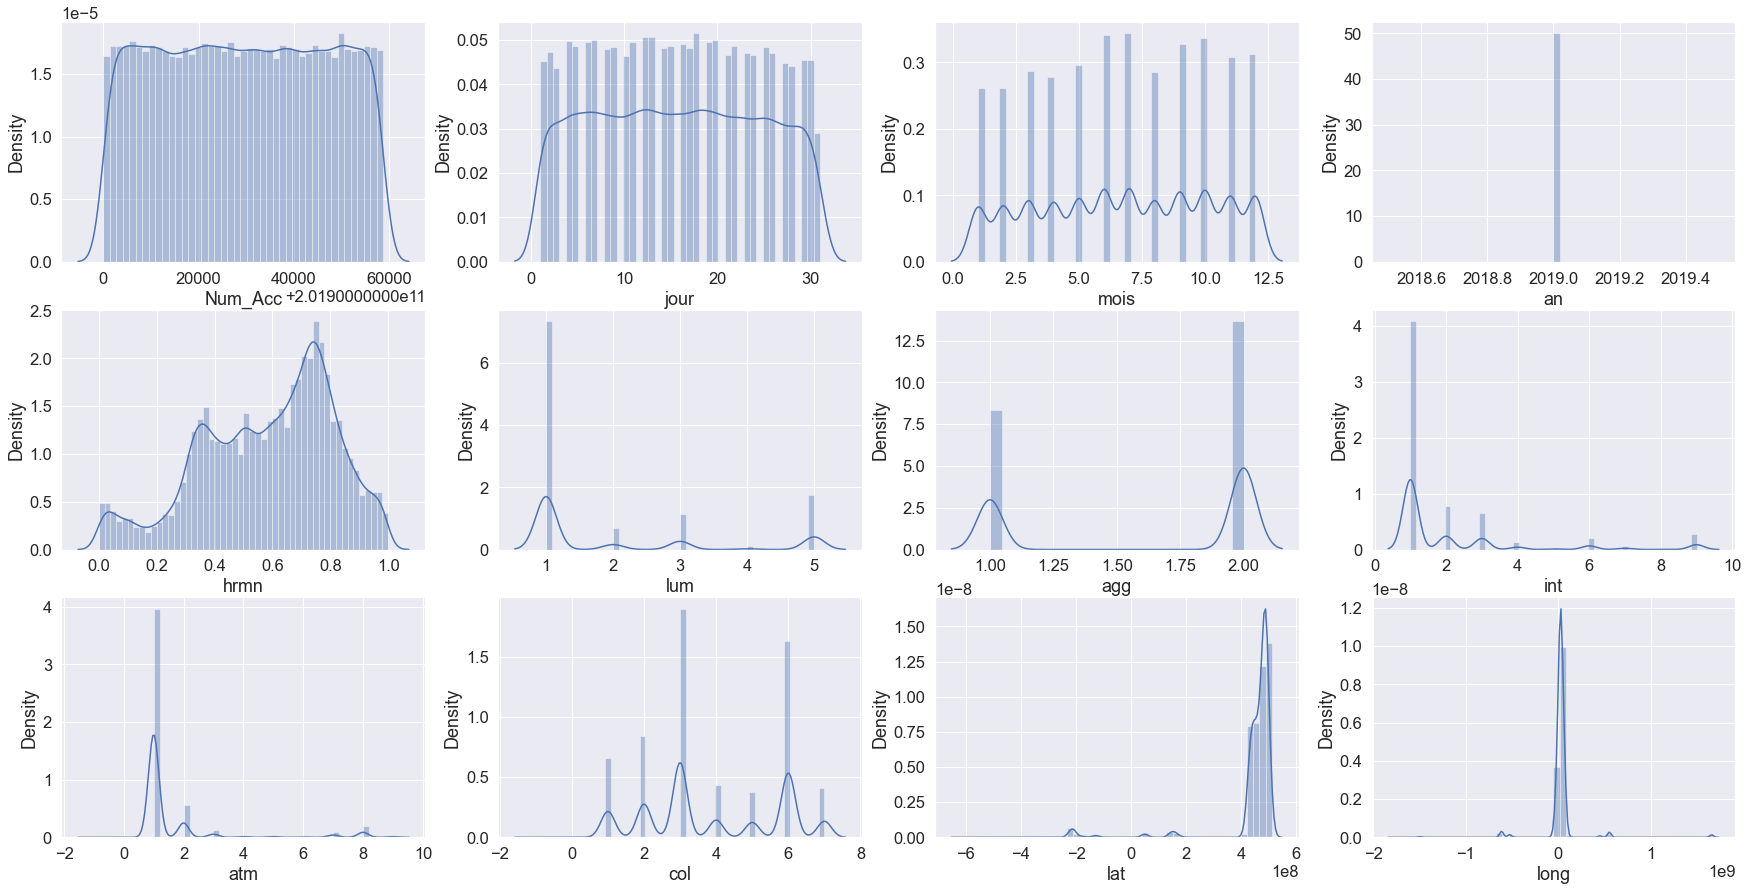

In [10]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(3,4, figsize=(30, 15))#画布的展示格式为3x4
i=0
for col in characteristics.select_dtypes(include=['float64','int64']):
    sns.distplot(characteristics[col],label=col,ax=ax[i//4][i%4])
    i=i+1
fig.show()

*特征“an”只与年份有关，对模型训练没有作用*


*事故地理坐标特征"lat""long"在横轴上数值过大（1e8），需要进行放缩处理*

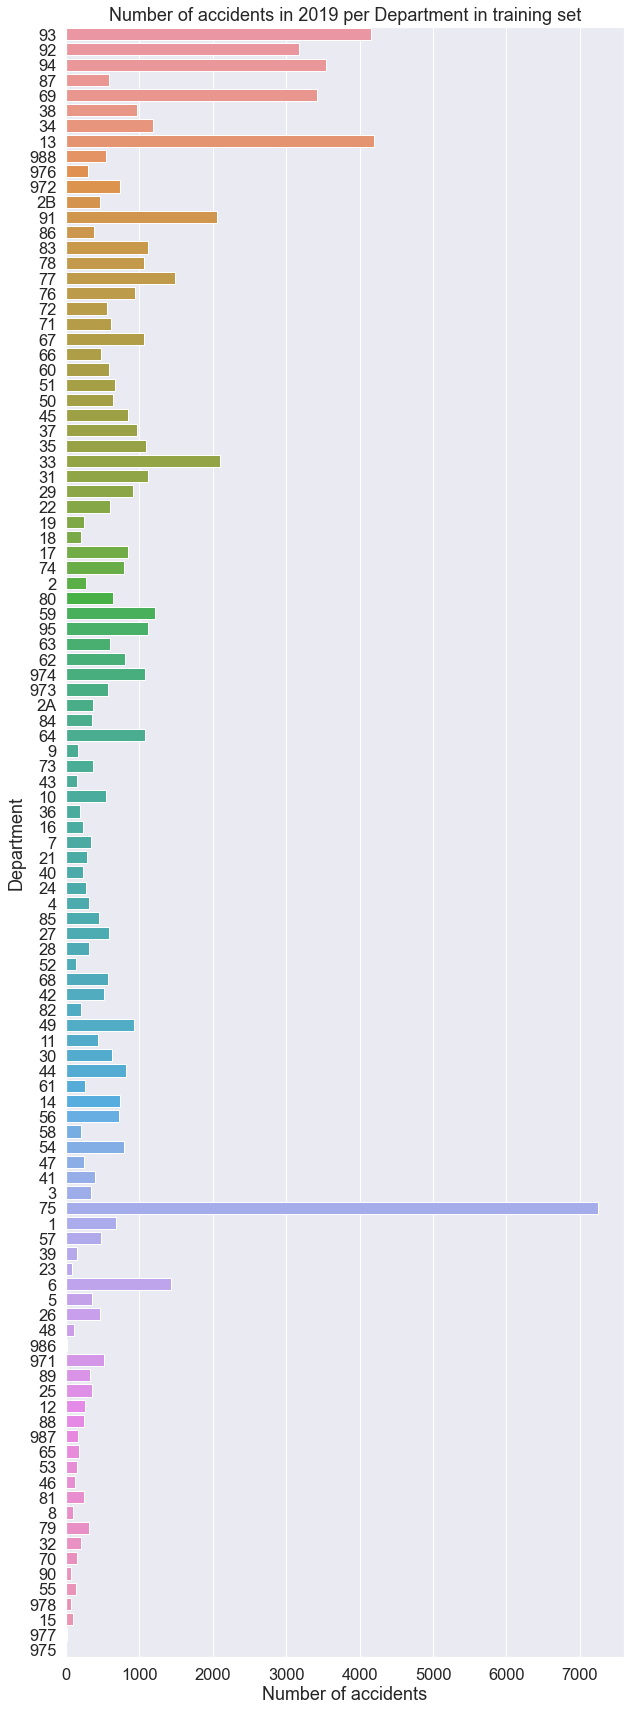

In [11]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10, 30))
plt.title('Number of accidents in 2019 per Department in training set')
sns.countplot(y=characteristics['dep'])
plt.xlabel("Number of accidents")
plt.ylabel("Department")
plt.show()

*在department中，75占比很高*

In [12]:
display(HTML('<h3><i>vehicles</i></h3>'))
for col in vehicles.select_dtypes("object"):
    print('\n')
    print('Number of values in "',col,'"', {vehicles[col].nunique()})
    print(vehicles[col].unique())
    print('\n')
    print('------------------------------------------------')



Number of values in " id_vehicule " {65985}
['138\xa0306\xa0524' '138\xa0306\xa0525' '138\xa0306\xa0522' ...
 '137\xa0982\xa0133' '137\xa0982\xa0132' '137\xa0982\xa0129']


------------------------------------------------


Number of values in " num_veh " {27}
['B01' 'A01' 'C01' 'D01' 'E01' 'Z01' 'Y01' 'I01' 'T01' 'O01' 'G01' 'F01'
 'M01' 'LB01' 'J01' 'L01' 'K01' 'H01' 'N01' 'W01' 'X01' 'V01' 'Q01' 'MA01'
 'CB01' '\\01' 'P01']


------------------------------------------------


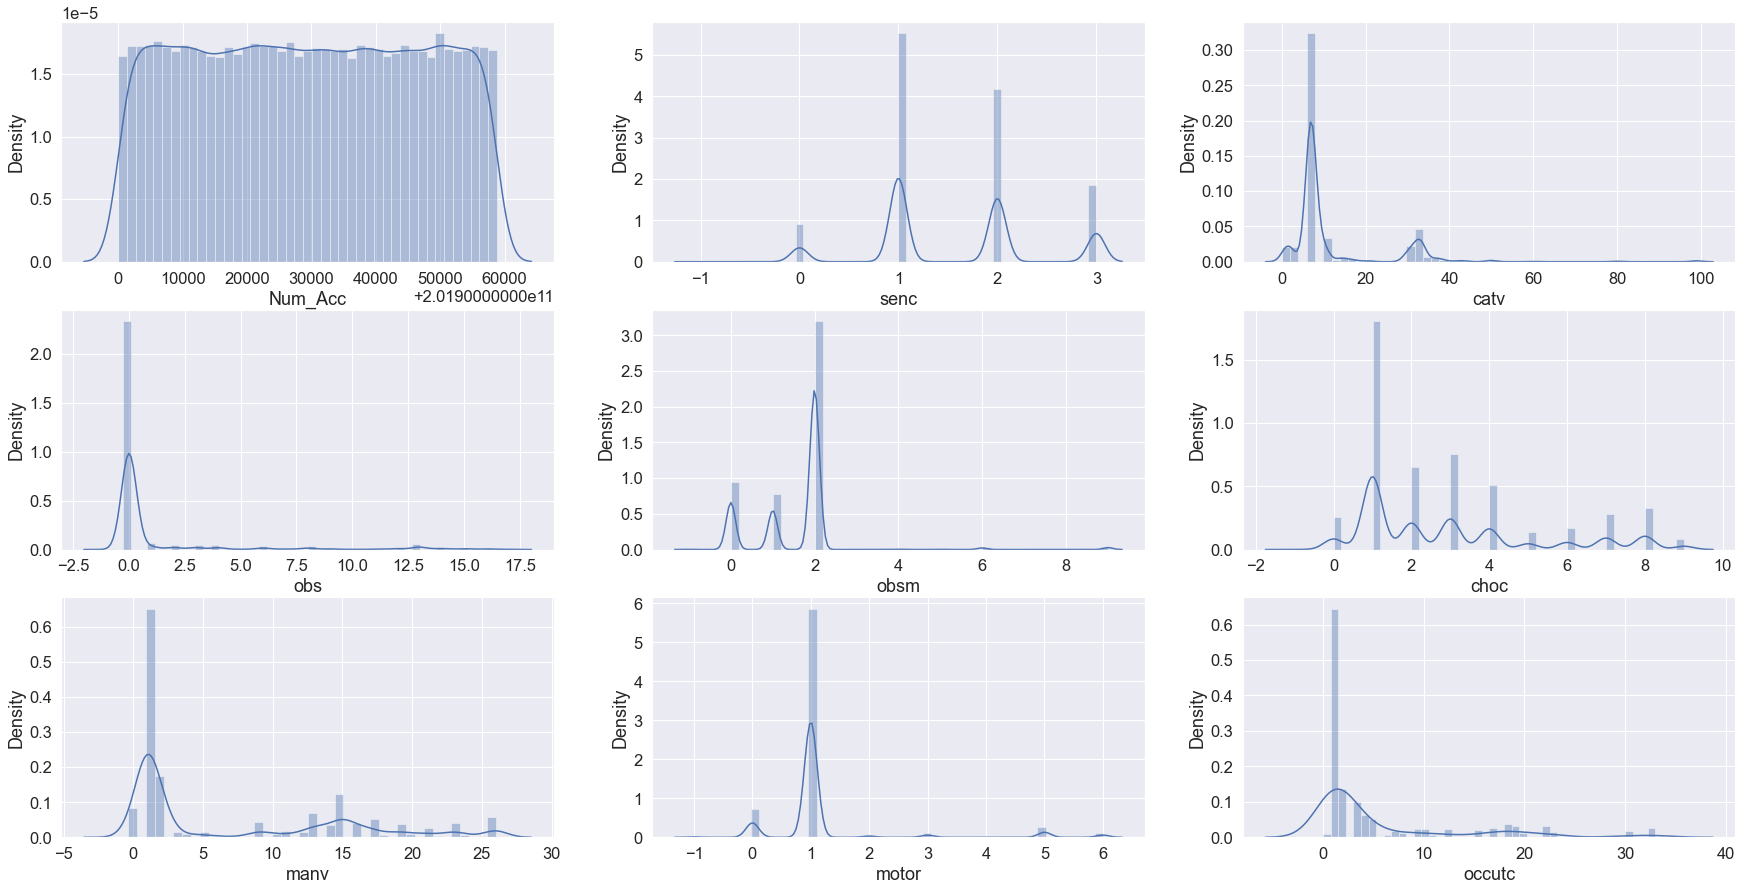

In [79]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(3,3, figsize=(30, 15))
i=0
for col in vehicles.select_dtypes(include=['float64','int64']):
    sns.distplot(vehicles[col],label=col,ax=ax[i//3][i%3])
    i=i+1
fig.show()

*特性"obs"特异性很高*

In [14]:
display(HTML('<h3><i>places</i></h3>'))
for col in places.select_dtypes("object"):
    print('\n')
    print('Number of values in "',col,'"', {places[col].nunique()})
    print(places[col].unique())
    print('\n')
    print('------------------------------------------------')



Number of values in " voie " {12484}
['3' '86' '4' ... 'PRESIDENT ROOSEVELT (RUE DU) N°2 A 26' 'VC du Rocher'
 'Gabriel Péri (AV)']


------------------------------------------------


Number of values in " v2 " {32}
[nan 'INT' 'B' 'D' ' -' 'A' 'R' 'E' 'N' 'F' 'C' 'EXT' 'Z' 'I' 'X' 'Y' 'W'
 'b' 'V' 'U' 'L' 'G' 'M' 'H' 'T' 'S' 'P' 'O' '15' 'II' 'K' '1A' 'IV']


------------------------------------------------


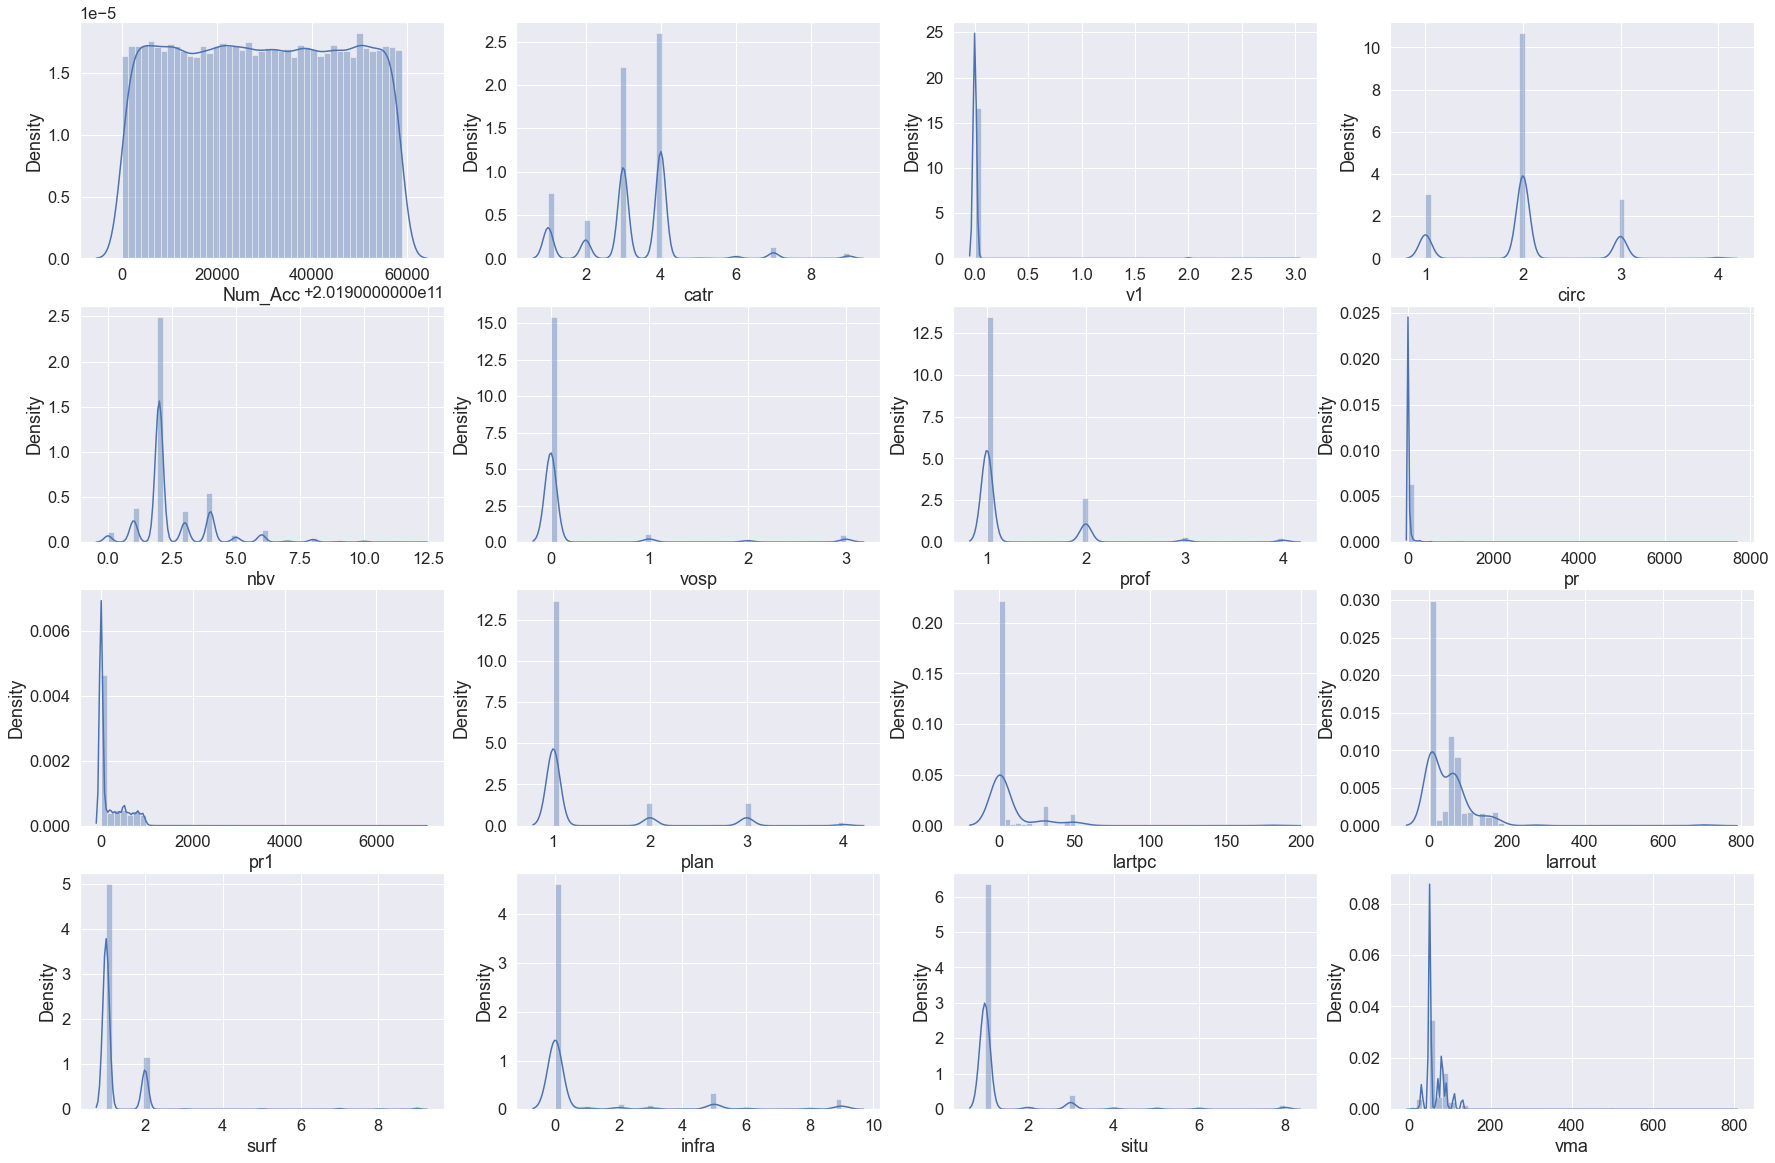

In [80]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(4,4, figsize=(30, 20))
i=0
for col in places.select_dtypes(include=['float64','int64']):
    sns.distplot(places[col],label=col,ax=ax[i//4][i%4])
    i=i+1
fig.show()

*特征 "V1","vosp","pr" 差异性很高*

In [16]:
display(HTML('<h3><i>drivers</i></h3>'))
for col in drivers.select_dtypes("object"):
    print('\n')
    print('Number of values in "',col,'"', {drivers[col].nunique()})
    print(drivers[col].unique())
    print('\n')
    print('------------------------------------------------')



Number of values in " id_vehicule " {65985}
['138\xa0306\xa0524' '138\xa0306\xa0525' '138\xa0306\xa0522' ...
 '137\xa0982\xa0133' '137\xa0982\xa0132' '137\xa0982\xa0129']


------------------------------------------------


Number of values in " num_veh " {27}
['B01' 'A01' 'C01' 'D01' 'E01' 'Z01' 'Y01' 'I01' 'T01' 'O01' 'G01' 'F01'
 'M01' 'LB01' 'J01' 'L01' 'K01' 'H01' 'N01' 'W01' 'X01' 'V01' 'Q01' 'MA01'
 'CB01' '\\01' 'P01']


------------------------------------------------


Number of values in " actp " {13}
['-1' '0' '3' '2' '1' 'B' '4' '9' '5' 'A' '8' '6' '7']


------------------------------------------------


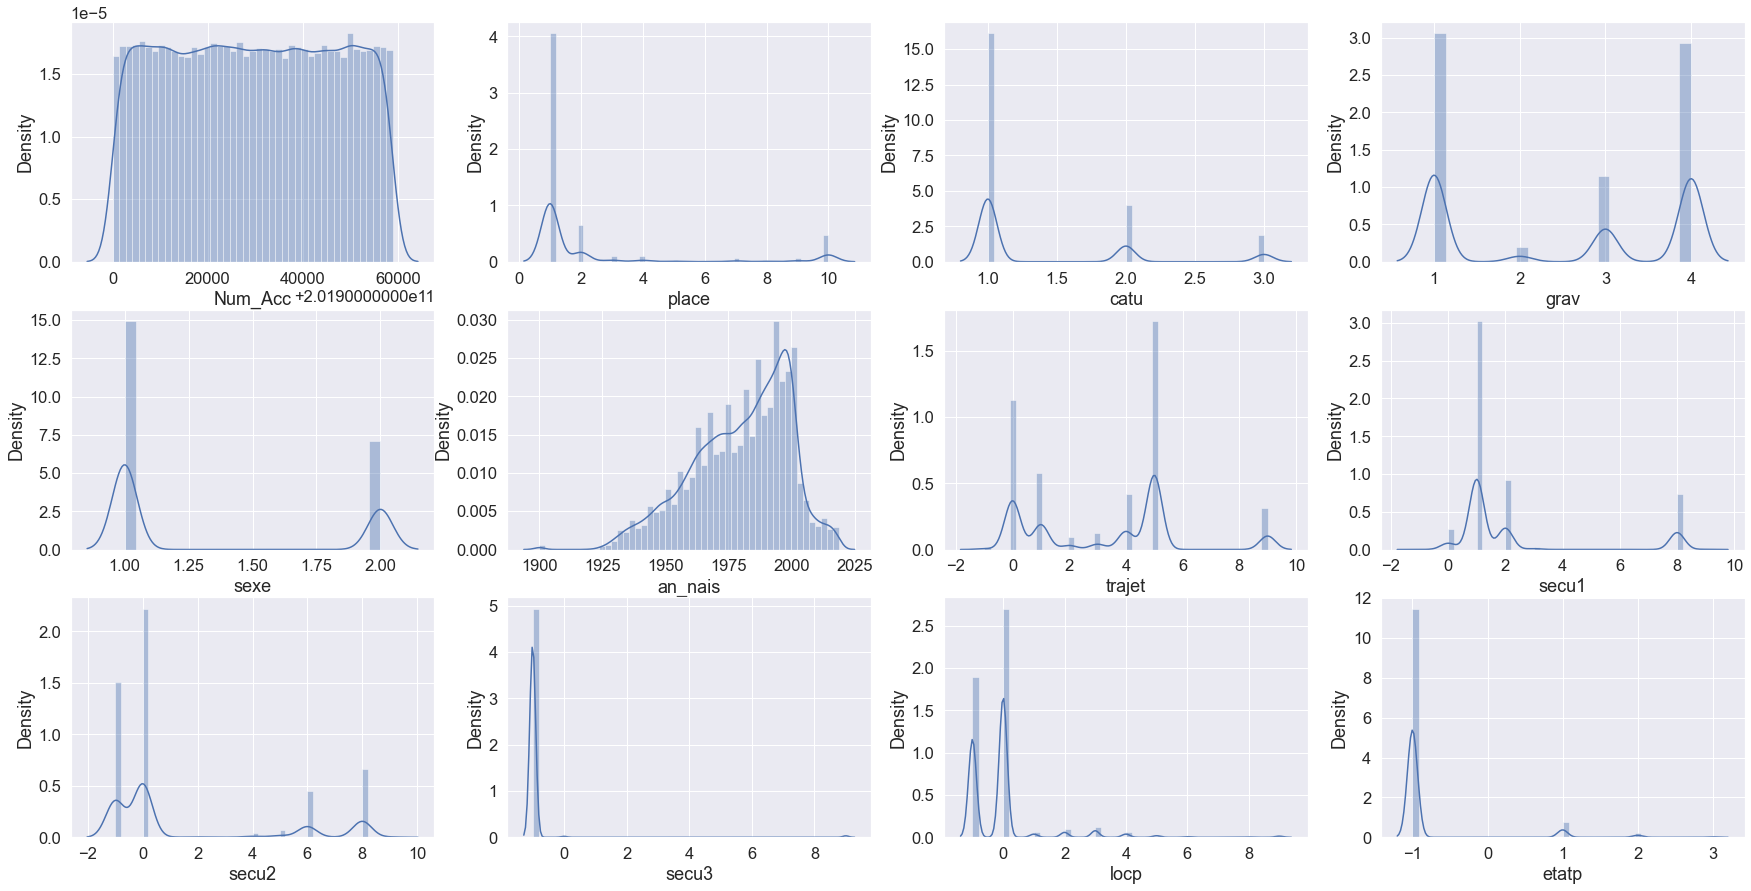

In [17]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(3,4, figsize=(30, 15))
i=0
for col in drivers.select_dtypes(include=['float64','int64']):
    sns.distplot(drivers[col],label=col,ax=ax[i//4][i%4])
    i=i+1
fig.show()

*特征"secu3"特异性很高*

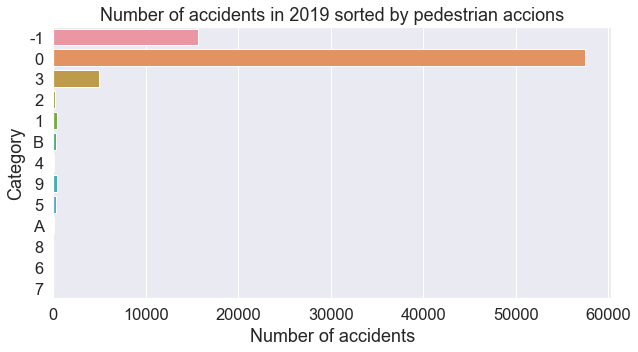

In [18]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10, 5))
plt.title('Number of accidents in 2019 sorted by pedestrian accions')
sns.countplot(y=drivers['actp'])
plt.xlabel("Number of accidents")
plt.ylabel("Category")
plt.show()

<font size=5>数据清洗</font>

In [32]:
def datacleaning(df):
    # 处理过多 NaN
    df = df.drop(['occutc','v2','lartpc','larrout'],axis=1)

    # 通过EDA处理特征

    df = df.drop(['id_vehicule','an','adr','com','obs','secu3','v1','vosp','pr','voie'],axis=1)
    df['lat']=df['lat']/10000000
    df['long']=df['long']/10000000
    df = df.set_index('Num_Acc')
    return df

*抛弃在数据分析中发现的特异性很高的无用数据*

*对地理坐标信息特征进行放缩处理*

*对于验证集，还需去除"sample_id"*

In [33]:
def testdatacleaning(df):
    # 处理过多 NaN
    df = df.drop(['occutc','v2','lartpc','larrout'],axis=1)

    # 通过EDA处理特征
    df = df.drop(['sample_id'],axis=1)
    df = df.drop(['id_vehicule','an','adr','com','obs','secu3','v1','vosp','pr','voie'],axis=1)
    df['lat']=df['lat']/10000000
    df['long']=df['long']/10000000
    df = df.set_index('Num_Acc')
    return df

*分别导入训练集和测试集*

In [34]:
train = pd.read_csv('train.csv',encoding="utf-8")
train.name = 'train'
test = pd.read_csv('test.csv',encoding="utf-8")
test.name = 'test'
verify = pd.read_csv('val.csv')
verify.name = 'verify'
frames = [train, verify]
#df_dataset = pd.concat(frames)
#display(df_dataset.head())

df_train=datacleaning(train)
df_verify=testdatacleaning(verify)
display(HTML('<h1>df_train</h1>'))
display(df_train.head())

#pd.set_option('display.max_row',max(df_dataset.shape[0],train.shape[0],test.shape[0]))
#pd.set_option('display.max_column',max(df_dataset.shape[1],train.shape[1],test.shape[1],))

#for df in frames:
    #print ("The dataset",df.name,"has",df.shape[0],"rows and",df.shape[1],"columns")

df_train.to_csv('df_train.csv')
df_verify.to_csv('df_verify.csv')

,jour,mois,hrmn,lum,dep,agg,int,atm,col,lat,long,catr,circ,nbv,prof,pr1,plan,surf,infra,situ,vma,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,locp,actp,etatp,senc,catv,obsm,choc,manv,motor
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201900000001,30.0,11.0,0.062500,4.0,93,1.0,1.0,1.0,2.0,48.896210,2.470120,1.0,3.0,10.0,1.0,900.0,2.0,1.0,2.0,1.0,70.0,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,2,7,2,5,23,1
201900000001,30.0,11.0,0.062500,4.0,93,1.0,1.0,1.0,2.0,48.896210,2.470120,1.0,3.0,10.0,1.0,900.0,2.0,1.0,2.0,1.0,70.0,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,2,17,0,3,11,1
201900000003,28.0,11.0,0.635417,1.0,92,1.0,1.0,1.0,4.0,48.935872,2.319174,1.0,3.0,8.0,1.0,500.0,3.0,1.0,0.0,1.0,90.0,C01,1,1,1,1,1966,1,1,0,-1,0,-1,1,7,2,4,23,6
201900000003,28.0,11.0,0.635417,1.0,92,1.0,1.0,1.0,4.0,48.935872,2.319174,1.0,3.0,8.0,1.0,500.0,3.0,1.0,0.0,1.0,90.0,A01,2,2,4,2,1930,9,1,0,-1,0,-1,1,7,2,1,2,1
201900000003,28.0,11.0,0.635417,1.0,92,1.0,1.0,1.0,4.0,48.935872,2.319174,1.0,3.0,8.0,1.0,500.0,3.0,1.0,0.0,1.0,90.0,B01,1,1,4,1,1995,9,1,0,-1,0,-1,1,7,0,4,2,1


In [35]:
from sklearn.preprocessing import LabelEncoder
def encoding(df):
    label = LabelEncoder()
    for c in df.select_dtypes("object"):
        df[c]=df[c].astype("|S")
        df[c]=label.fit_transform(df[c])#先拟合再转化
    return df

def imputation(df):#插值
    df = df.fillna(df.median())#使用平均值填充nan
    df = df.dropna()#删除有缺失值的行
    return df

def preprocessing(df):
    df = encoding(df)
    df = imputation(df) 

    return df

*将"object"类型的对象拟合转化为便于处理的数字类型*


*使用前后的平均值填充nan*


*删除缺失值过多的行*

In [36]:
df = pd.read_csv('df_train.csv',index_col=0,encoding="utf-8")
df = preprocessing(df)
df_verify = pd.read_csv('df_verify.csv',index_col=0,encoding="utf-8")
df_verify = preprocessing(df_verify)

display(HTML('<h1>df</h1>'))
display(df.head())
print("----------------------------------")
display(HTML('<h1>df_verify</h1>'))
display(df_verify.head())
print("----------------------------------")

display(HTML('<h3>Complete dataset shape :</h3>'))
display(df.shape)
print("----------------------------------")


,jour,mois,hrmn,lum,dep,agg,int,atm,col,lat,long,catr,circ,nbv,prof,pr1,plan,surf,infra,situ,vma,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,locp,actp,etatp,senc,catv,obsm,choc,manv,motor
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201900000001,30.0,11.0,0.062500,4.0,93,1.0,1.0,1.0,2.0,48.896210,2.470120,1.0,3.0,10.0,1.0,900.0,2.0,1.0,2.0,1.0,70.0,1,1,1,4,2,1993,5,1,0,-1,0,-1,2,7,2,5,23,1
201900000001,30.0,11.0,0.062500,4.0,93,1.0,1.0,1.0,2.0,48.896210,2.470120,1.0,3.0,10.0,1.0,900.0,2.0,1.0,2.0,1.0,70.0,0,1,1,1,1,1959,0,1,0,-1,0,-1,2,17,0,3,11,1
201900000003,28.0,11.0,0.635417,1.0,92,1.0,1.0,1.0,4.0,48.935872,2.319174,1.0,3.0,8.0,1.0,500.0,3.0,1.0,0.0,1.0,90.0,2,1,1,1,1,1966,1,1,0,-1,1,-1,1,7,2,4,23,6
201900000003,28.0,11.0,0.635417,1.0,92,1.0,1.0,1.0,4.0,48.935872,2.319174,1.0,3.0,8.0,1.0,500.0,3.0,1.0,0.0,1.0,90.0,0,2,2,4,2,1930,9,1,0,-1,1,-1,1,7,2,1,2,1
201900000003,28.0,11.0,0.635417,1.0,92,1.0,1.0,1.0,4.0,48.935872,2.319174,1.0,3.0,8.0,1.0,500.0,3.0,1.0,0.0,1.0,90.0,1,1,1,4,1,1995,9,1,0,-1,1,-1,1,7,0,4,2,1


----------------------------------


,jour,mois,hrmn,lum,dep,agg,int,atm,col,lat,long,catr,circ,nbv,prof,pr1,plan,surf,infra,situ,vma,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,locp,actp,etatp,senc,catv,obsm,choc,manv,motor
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201900053412,17.0,9.0,0.791667,1.0,94,2.0,3.0,1.0,3.0,48.771570,2.524980,3.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,50.0,1,4,2,4,1,2012,2,1,0,-1,1,-1,2,7,2,8,15,1
201900006923,6.0,6.0,0.409722,1.0,18,2.0,1.0,1.0,1.0,49.353499,0.520699,9.0,2.0,2.0,1.0,15.0,1.0,1.0,0.0,1.0,50.0,1,10,3,4,1,2003,5,0,-1,3,4,3,2,7,1,1,1,1
201900017142,14.0,9.0,0.041667,3.0,105,1.0,1.0,1.0,6.0,-20.724779,164.434759,2.0,2.0,2.0,1.0,500.0,2.0,1.0,0.0,3.0,110.0,0,9,2,2,2,1977,5,0,-1,0,1,-1,1,7,0,1,1,1
201900002567,14.0,2.0,0.576389,1.0,15,1.0,3.0,1.0,1.0,44.716965,0.799439,3.0,2.0,2.0,2.0,15.0,2.0,1.0,0.0,1.0,80.0,0,1,1,2,1,1947,5,2,-1,0,1,-1,3,1,2,8,16,5
201900005013,13.0,6.0,0.753472,1.0,42,2.0,1.0,1.0,3.0,44.433525,0.112285,3.0,2.0,2.0,3.0,450.0,3.0,1.0,0.0,1.0,50.0,0,1,1,3,1,1997,5,2,-1,0,1,-1,2,33,2,1,13,1


----------------------------------


(79786, 39)

----------------------------------


<font size=5>数据填充</font>

*查看四种伤亡结果在训练集、测试集中的占比*

[]

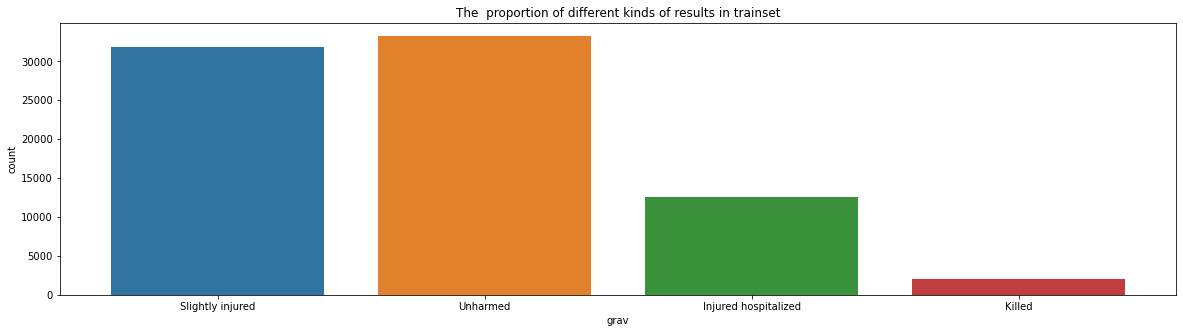

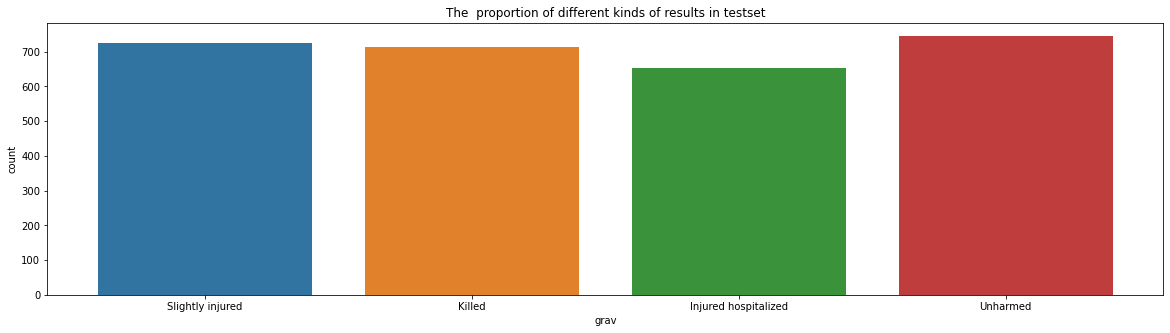

In [37]:
plt.figure(figsize=(20,5))
plt.title('The  proportion of different kinds of results in trainset')
sns.countplot(df['grav'].map({1:'Unharmed',
                                  2:'Killed',
                                  3:'Injured hospitalized',
                                  4:'Slightly injured'
                                }))#各种结果占据的比例
plt.plot()
plt.figure(figsize=(20,5))
plt.title('The  proportion of different kinds of results in testset')
sns.countplot(df_verify['grav'].map({1:'Unharmed',
                                  2:'Killed',
                                  3:'Injured hospitalized',
                                  4:'Slightly injured'
                                }))
plt.plot()

*放缩训练集，使四种伤亡情况占比相似*

[]

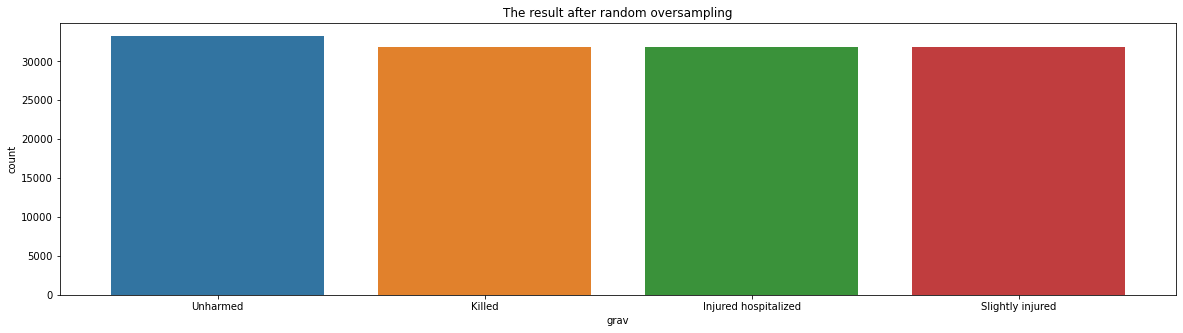

In [38]:
#记录伤亡情况的值
count_class_4, count_class_1, count_class_3, count_class_2 = df['grav'].value_counts()

# 按结果划分
df_class_1 = df[df['grav'] == 1]
df_class_2 = df[df['grav'] == 2]
df_class_3 = df[df['grav'] == 3]
df_class_4 = df[df['grav'] == 4]

#数据填充
df_class_2_over = df_class_2.sample(count_class_1, replace=True, random_state=33)
df_class_3_over = df_class_3.sample(count_class_1, replace=True, random_state=33)
df_class_4_over = df_class_4.sample(count_class_1, replace=True, random_state=33)
df_over = pd.concat([df_class_1, df_class_2_over, df_class_3_over, df_class_4_over], axis=0)

plt.figure(figsize=(20,5))
plt.title('The result after random oversampling')
sns.countplot(df_over['grav'].map({1:'Unharmed',
                                  2:'Killed',
                                  3:'Injured hospitalized',
                                  4:'Slightly injured'
                                }))
plt.plot()

<font size=5>模型训练</font>

Text(0.5, 1.0, 'TestSet')

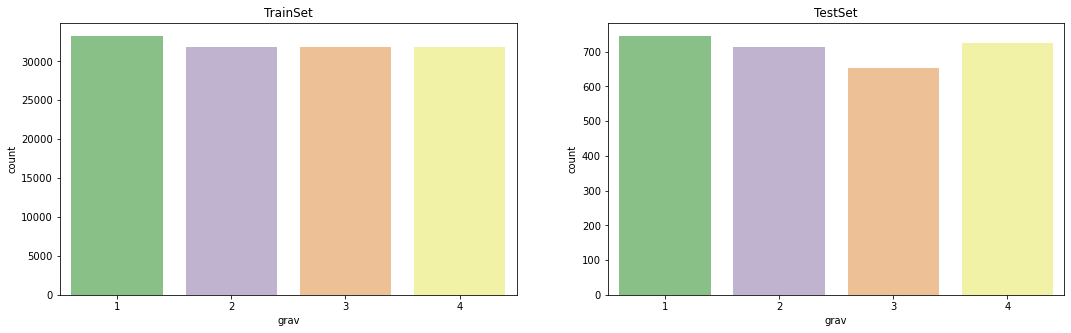

In [39]:
#from sklearn.model_selection import train_test_split

#trainset, testset = train_test_split(df_over, test_size=0.15, random_state=42)
trainset = df_over
testset = df_verify
fig, ax = plt.subplots(1,2, figsize=(18, 5))
sns.countplot(x = 'grav' , data = trainset,ax=ax[0],palette="Accent").set_title('TrainSet')
sns.countplot(x = 'grav' , data = testset,ax=ax[1],palette="Accent").set_title('TestSet')

In [40]:
#分割数据集
X_train = trainset.drop('grav',axis=1)
y_train = trainset['grav']
X_test = testset.drop('grav',axis=1)
y_test = testset['grav']

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [42]:
preprocessor = make_pipeline(StandardScaler())#数据的标准化

PCAPipeline = make_pipeline(preprocessor, PCA(n_components=3,random_state=0))
#一个训练流程
RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(n_estimators=100,random_state=0))#0.52
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(learning_rate=0.9,random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag'))

In [44]:
dict_of_models = {'KNN': KNNPipeline,
                  'RandomForest': RandomPipeline,
                  'AdaBoost': AdaPipeline,
                  'LR': LRPipeline}

In [45]:
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
#评估模型准确率
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
   # print(confusion_matrix(y_test,y_pred))
   # print('-')
    print(classification_report(y_test,y_pred))
    print('-')

In [46]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

---------------------------------
KNN
Accuracy =  0.43899858956276444
-
              precision    recall  f1-score   support

           1       0.50      0.68      0.58       745
           2       0.54      0.24      0.33       713
           3       0.34      0.45      0.39       654
           4       0.44      0.38      0.40       724

    accuracy                           0.44      2836
   macro avg       0.45      0.44      0.42      2836
weighted avg       0.46      0.44      0.43      2836

-
---------------------------------
RandomForest
Accuracy =  0.5204513399153737
-
              precision    recall  f1-score   support

           1       0.60      0.89      0.71       745
           2       0.82      0.11      0.20       713
           3       0.39      0.57      0.46       654
           4       0.54      0.50      0.52       724

    accuracy                           0.52      2836
   macro avg       0.59      0.52      0.47      2836
weighted avg       0.59      0.

In [48]:
#from sklearn.externals import joblib
#joblib.dump(AdaPipeline, 'AdaPipeline.pkl')

*这里无法使用joblib保存模型*

In [65]:
df_test = pd.read_csv('test.csv',index_col=0,encoding="utf-8")
test_result = df_test
test_result['grav'] = -1
test_result = test_result.loc[:,['grav']]
#df_test = preprocessing(df_test)
df_test = datacleaning(df_test)
df_test = df_test.drop(['grav'],axis=1)
df_test.to_csv('df_test.csv')


In [66]:
df_test = pd.read_csv('df_test.csv',index_col=0,encoding="utf-8")
df_test = preprocessing(df_test)

In [67]:
display(HTML('<h1>df_test</h1>'))
display(df_test.head())
print("----------------------------------")
display(HTML('<h1>test_result</h1>'))
display(test_result.head())
print("----------------------------------")

,jour,mois,hrmn,lum,dep,agg,int,atm,col,lat,long,catr,circ,nbv,prof,pr1,plan,surf,infra,situ,vma,num_veh,place,catu,sexe,an_nais,trajet,secu1,secu2,locp,actp,etatp,senc,catv,obsm,choc,manv,motor
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201900038114,2.0,5.0,0.552083,1.0,73,2.0,2.0,2.0,3.0,48.853525,2.410791,4.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,1.0,50.0,1,1,1,1,1964,1,1,0,0,1,-1,0,10,2,1,1,1
201900041727,8.0,12.0,0.944444,5.0,98,2.0,2.0,3.0,6.0,4.886016,-52.335329,2.0,2.0,2.0,1.0,560.0,1.0,2.0,0.0,1.0,50.0,0,10,3,1,2003,5,0,-1,3,6,1,2,7,1,2,0,1
201900043728,24.0,5.0,0.041667,5.0,93,2.0,9.0,1.0,5.0,48.891700,2.445100,3.0,3.0,6.0,1.0,0.0,1.0,1.0,0.0,1.0,50.0,1,1,1,2,1977,9,1,0,-1,0,-1,3,7,2,0,0,1
201900036619,7.0,11.0,0.465278,1.0,4,1.0,1.0,2.0,2.0,43.532739,5.378036,1.0,3.0,3.0,1.0,0.0,1.0,2.0,0.0,1.0,130.0,1,1,1,1,1973,4,1,-1,0,1,-1,2,15,0,6,2,1
201900011711,18.0,3.0,0.684028,1.0,74,2.0,1.0,1.0,2.0,49.436140,1.101320,3.0,3.0,6.0,1.0,570.0,1.0,2.0,0.0,1.0,50.0,0,2,2,2,1950,5,1,0,-1,1,-1,1,7,2,4,2,1


----------------------------------


,grav
sample_id,
0,-1
1,-1
2,-1
3,-1
4,-1


----------------------------------


In [71]:
AdaPipeline.fit(X_train, y_train)
y_pred = AdaPipeline.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('-')
print(classification_report(y_test,y_pred))
print('-')
T_pred = AdaPipeline.predict(df_test)
print(T_pred)
pred_list=[]
for i in T_pred:
    pred_list.append(i)
test_result['grav'] = T_pred
test_result.to_csv('test_result.csv')
display(test_result.head())

Accuracy =  0.5401974612129761
-
              precision    recall  f1-score   support

           1       0.62      0.76      0.68       745
           2       0.55      0.63      0.59       713
           3       0.40      0.29      0.34       654
           4       0.53      0.45      0.49       724

    accuracy                           0.54      2836
   macro avg       0.52      0.53      0.52      2836
weighted avg       0.53      0.54      0.53      2836

-
[1 2 4 ... 2 2 2]


,grav
sample_id,
0,1
1,2
2,4
3,1
4,1


*Accuracy =  0.5401974612129761*


*precision = 0.62  recall = 0.76  f1-score = 0.68*